Algoritmo hill climbing simulated_annealing con  100000  iteraciones
Tiempo de ejecución: 0.8704040050506592 segundos
Solucion: 4.0000033984200085
Funcion Fitness: -1.999999999994225


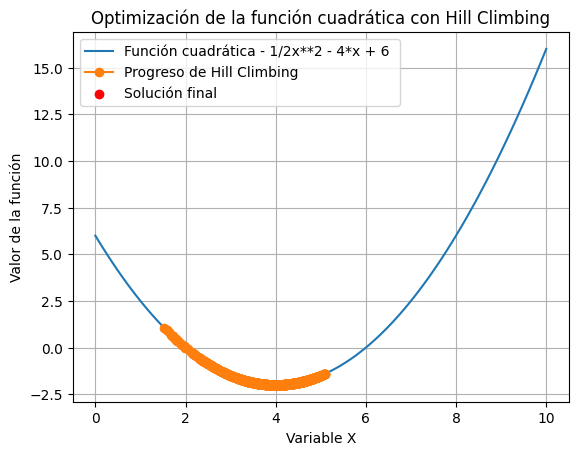

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time as t
starting_point = np.random.rand() * 10  # Punto de inicio aleatorio
step_size = 0.1
iterations = 100000
initial_temperature = 1
cooling_rate = 0.999

# Definimos la función cuadrática
def fitness(x):
    return 0.5 * x ** 2 - 4 * x + 6

def get_neighbor(current_point ):
  return current_point + step_size * np.random.randn()

def simulated_annealing_quadratic(starting_point, iterations, initial_temperature, cooling_rate):
    print("Algoritmo hill climbing simulated_annealing con ", iterations, " iteraciones")
    current_point = starting_point
    current_fitness = fitness(current_point)
    history = [current_point]

    for i in range(iterations):
        # Generamos un nuevo punto vecino
        neighbor = get_neighbor(current_point)

        # Calculamos la diferencia de fitness entre el vecino y el punto actual
        delta_fitness = fitness(neighbor) - current_fitness

        # Si el vecino es mejor o se acepta según la probabilidad
        if delta_fitness < 0 or np.random.rand() < np.exp(-delta_fitness / initial_temperature):
            current_point = neighbor
            current_fitness = fitness(neighbor)

        # Reducimos la temperatura
        initial_temperature *= cooling_rate

        # Guardamos el historial de puntos
        history.append(current_point)

    return current_point, current_fitness, history


def hill_climbing_quadratic(starting_point, iterations):
    print("Algoritmo hill climbing con ", iterations, " iteraciones")
    current_point = starting_point
    current_fitness = fitness(current_point)
    history = [current_point]

    for i in range(iterations):
        # Generamos un nuevo punto vecino
        neighbor = get_neighbor(current_point)
        neighbor_fitness = fitness(neighbor)

        # Actualizamos el punto actual si el vecino es mejor
        if neighbor_fitness < current_fitness:
            current_point = neighbor
            current_fitness = neighbor_fitness

        # Guardamos el historial de puntos
        history.append(current_point)

    return current_point, current_fitness, history


# Ejecutamos el algoritmo de Hill Climbing
start_time = t.time()
solution, minimum_fitness, history = hill_climbing_quadratic(starting_point, iterations)
# Ejecutamos el algoritmo de Hill Climbing Simulated Annealing
#solution, minimum_fitness, history = simulated_annealing_quadratic(starting_point, iterations,initial_temperature, cooling_rate)
end_time = t.time()
execution_time = end_time - start_time
print("Tiempo de ejecución:", execution_time, "segundos")
print("Solucion:",solution)
print("Funcion Fitness:",minimum_fitness)
# Visualizamos la progresión de las soluciones
x = np.linspace(0, 10, 100)
y = fitness(x)
plt.plot(x, y, label='Función cuadrática - 1/2x**2 - 4*x + 6 ')
plt.plot(history, [quadratic_function(p) for p in history], marker='o', linestyle='-',label='Progreso de Hill Climbing')
plt.scatter(solution, minimum_fitness, color='red', label='Solución final')
plt.xlabel('Variable X')
plt.ylabel('Valor de la función')
plt.title('Optimización de la función cuadrática con Hill Climbing')
plt.legend()
plt.grid(True)
plt.show()
